In [10]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph, START, END
import random


In [11]:
class AgentState(TypedDict):
    name: str
    number: List[str]
    counter: int

In [12]:
def greet(state: AgentState) -> AgentState:
    state["name"] = f"hi there, {state['name']}"
    state['counter'] = 0
    return state

def random_node(state: AgentState) -> AgentState:
    state['number'].append(random.randint(0,10))
    state['counter'] += 1
    
    return state

def should_continue(state: AgentState) -> AgentState:
    if state['counter'] < 5:
        return "loop"
    else:
        return "exit"
    
    

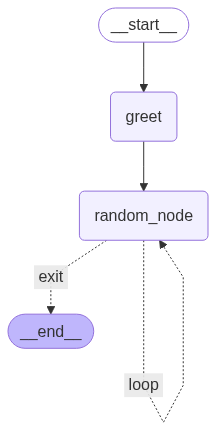

In [16]:
graph = StateGraph(AgentState)
graph.add_node("greet", greet)
graph.add_node("random_node", random_node)
graph.add_edge(START, "greet")
graph.add_edge("greet", "random_node")

graph.add_conditional_edges(
    "random_node",
    should_continue,
    {
        "loop":"random_node",
        "exit": END
    }
)


graph.compile()